In [1]:
import sys
from os.path import join, exists, abspath
from os import getcwd
from glob import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colormaps, cm, colors
import scipy
import h5py
import seaborn as sns

from tqdm import tqdm

In [2]:
import nibabel as nb
from nilearn import plotting
from nipype.interfaces import fsl

In [3]:
dir_current = getcwd().replace('\\','/')

tmp = dir_current.split('/')
idx = [ii for ii, s in enumerate(tmp) if s=='github'][0]

dir_git = '/'.join(tmp[:idx+1])
dir_git

'/home/sungbeenpark/github'

In [4]:
path_module = abspath(join(dir_git,'nitools'))
if exists(path_module):
    print('added the path, %s'%path_module)
    if path_module not in sys.path:
        sys.path.append(path_module)

import nitools as nt

added the path, /home/sungbeenpark/github/nitools


In [5]:
path_module = abspath(join(dir_git,'SUITPy'))
if exists(path_module):
    print('added the path, %s'%path_module)
    if path_module not in sys.path:
        sys.path.append(path_module)

import SUITPy as suit

added the path, /home/sungbeenpark/github/SUITPy


In [6]:
path_module = abspath(dir_git)
if exists(path_module):
    print('added the path, %s'%path_module)
    if path_module not in sys.path:
        sys.path.append(path_module)

import surfAnalysisPy as surf

added the path, /home/sungbeenpark/github


In [7]:
dir_work = join('/mnt/f/SeqSpatialSupp_fMRI')

In [8]:
tmp = [1,2,3,5,6,8,9,10,11,12,13,14]
list_nn = ['%02d'%i for i in tmp]
list_nn

['01', '02', '03', '05', '06', '08', '09', '10', '11', '12', '13', '14']

---

## - FreeSurfer

In [9]:
dir_atlas = join(dir_git,'SeqSpatialSupp_fMRI/atlas/fs_LR_32k')

In [10]:
underlay = join(dir_atlas,'fs_LR.32k.LR.sulc.dscalar.gii')
border = join(dir_git,'surfAnalysisPy/standard_mesh/fs_L/fs_LR.32k.L.border')

In [11]:
def gifti_to_cmap(label_img):
    if isinstance(label_img, str):
        label_img = nb.load(label_img)
    if not isinstance(label_img, nb.gifti.gifti.GiftiImage):
        raise TypeError("Expected 'gifti' file")

    labels = label_img.labeltable.labels
    rgba = np.zeros((len(labels),4))
    for i,label in enumerate(labels):
        rgba[i,] = labels[i].rgba
    
    cmap = colors.ListedColormap(rgba, N=len(rgba))

    return cmap

In [12]:
def cmap_to_cbar(cmap, list_label):
    # 0~11 값이 각각 구간 중앙에 오도록 boundaries 설정
    N = cmap.N
    norm = colors.BoundaryNorm(boundaries=np.arange(-0.5, N, 1), ncolors=N)
    
    # colorbar만 따로 그리기
    fig, ax = plt.subplots(figsize=(8, 1))
    fig.subplots_adjust(bottom=0.5)
    
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])  # 더미 mappable
    
    cbar = fig.colorbar(sm, cax=ax, orientation='horizontal', ticks=np.arange(N))
    
    # 라벨을 변경
    if N == len(list_label)+1:
        labels = np.concatenate((['0'],list_label))
    elif N == len(list_label):
        labels = list_label
    else:
        labels = 0
    cbar.ax.set_xticklabels(labels)
    
    plt.show()

1. ROI: general

In [13]:
list_roi = ['S1', 'M1', 'PMd', 'PMv', 'SMA', 'V1', 'SPLa', 'SPLp']

9 [0 1 2 3 4 5 6 7 8]


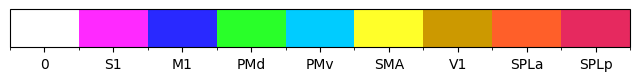

In [14]:
data = nb.load(join(dir_atlas,'ROI.32k.L.label.gii'))
tmp = np.unique(data.darrays[0].data)
print(len(tmp), tmp)

cmap = gifti_to_cmap(data)
cmap_to_cbar(cmap, list_roi)

<Axes: >

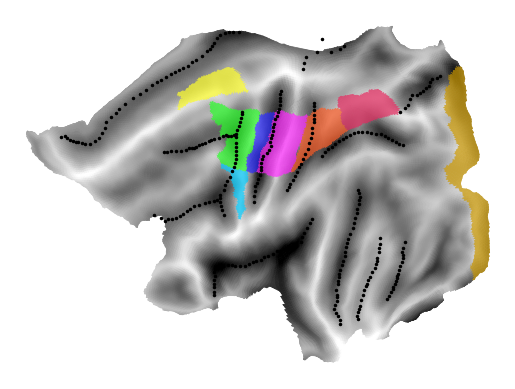

In [15]:
fig, ax = plt.subplots()

plt.sca(ax)
surf.plot.plotmap(
    data=data,
    surf='fs32k_L',
    underlay=underlay, alpha=0.7, cmap=cmap, colorbar=False,
    borders=border, bordercolor='black', bordersize=3,
    overlay_type='func', render='matplotlib'
)

2. individual

In [16]:
dir_surf = join(dir_work,'surfaceWB')

In [20]:
glm = 3
dir_glm = join(dir_work,'glm_%1d'%glm)

In [38]:
subj = 'S01'
ResMS = join(dir_glm,subj,'ResMS.nii')

In [39]:
surf_white = join(dir_surf,subj,'%s.L.white.32k.surf.gii'%subj)
surf_pial = join(dir_surf,subj,'%s.L.pial.32k.surf.gii'%subj)
surf_sulc = join(dir_surf,subj,'%s.L.sulc.32k.shape.gii'%subj)

In [42]:
surf_ResMS = surf.map.vol_to_surf(
    [ResMS], pialSurfGifti=surf_pial, whiteSurfGifti=surf_white
)
surf_ResMS.shape

(32492, 1)

<Axes: >

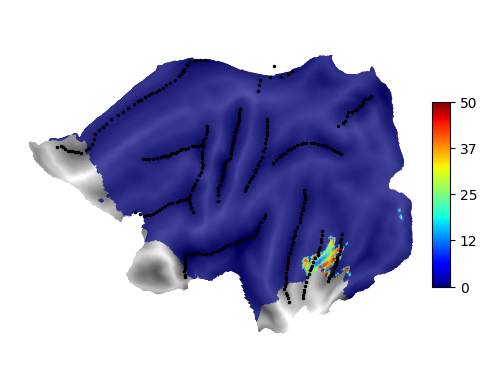

In [44]:
surf.plot.plotmap(
    data=surf_ResMS*(surf_ResMS<50),
    surf='fs32k_L',
    underlay=underlay, alpha=0.7, cmap=cm.jet, colorbar=True,
    borders=border, bordercolor='black', bordersize=3,
    overlay_type='func', render='matplotlib'
    )

---